In [929]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings

In [930]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Reading and Understanding Data

In [931]:
housing = pd.read_csv('train.csv')
housing_test = pd.read_csv('test.csv')
print(housing.info())
print(housing.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [932]:
housing_test.shape

(1459, 80)

In [933]:
testId = housing_test['Id']

In [934]:
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [935]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [936]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Data cleaning and EDA

- Missing Value Treatment

In [937]:
missing_info = pd.DataFrame(round(100*(housing.isnull().sum()/len(housing.index)),2))
missing_info = missing_info.loc[missing_info[0]!=0]
missing_info

,0
LotFrontage,17.74
Alley,93.77
MasVnrType,0.55
MasVnrArea,0.55
BsmtQual,2.53
BsmtCond,2.53
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtFinType2,2.60
Electrical,0.07


In [938]:
missing_info_test = pd.DataFrame(round(100*(housing_test.isnull().sum()/len(housing_test.index)),2))
missing_info_test = missing_info_test.loc[missing_info_test[0]!=0]
missing_info_test

,0
MSZoning,0.27
LotFrontage,15.56
Alley,92.67
Utilities,0.14
Exterior1st,0.07
Exterior2nd,0.07
MasVnrType,1.10
MasVnrArea,1.03
BsmtQual,3.02
BsmtCond,3.08


In [939]:
all_data = pd.concat([housing.drop(['SalePrice'],axis=1),housing_test])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [940]:
#dropping cols with large missing values
missing_val_cols = ['MiscFeature','Fence','PoolQC','Alley','FireplaceQu']
housing.drop(missing_val_cols,inplace=True,axis=1)
housing_test.drop(missing_val_cols,inplace=True,axis=1)
print(housing.shape)
print(housing_test.shape)

missing_info = pd.DataFrame(round(100*(housing.isnull().sum()/len(housing.index)),2))
missing_info = missing_info.loc[missing_info[0]!=0]
missing_info

(1460, 76)
(1459, 75)


,0
LotFrontage,17.74
MasVnrType,0.55
MasVnrArea,0.55
BsmtQual,2.53
BsmtCond,2.53
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtFinType2,2.60
Electrical,0.07
GarageType,5.55


#### Treating garage related missing values

In [941]:
garageCols = housing.columns[housing.columns.str.startswith('Gar')]
for col in garageCols:
    if (col != "GarageYrBlt") & (col != "GarageArea"):
        print("===={}====".format(col))
        print(housing[col].value_counts(dropna=False))
        print("\n")

====GarageType====
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


====GarageFinish====
Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64


====GarageCars====
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


====GarageQual====
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64


====GarageCond====
TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64




In [942]:
garageCols = housing_test.columns[housing_test.columns.str.startswith('Gar')]
for col in garageCols:
    if (col != "GarageYrBlt") & (col != "GarageArea"):
        print("===={}====".format(col))
        print(housing_test[col].value_counts(dropna=False))
        print("\n")

====GarageType====
Attchd     853
Detchd     392
BuiltIn     98
NaN         76
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64


====GarageFinish====
Unf    625
RFn    389
Fin    367
NaN     78
Name: GarageFinish, dtype: int64


====GarageCars====
2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
NaN      1
5.0      1
Name: GarageCars, dtype: int64


====GarageQual====
TA     1293
NaN      78
Fa       76
Gd       10
Po        2
Name: GarageQual, dtype: int64


====GarageCond====
TA     1328
NaN      78
Fa       39
Po        7
Gd        6
Ex        1
Name: GarageCond, dtype: int64




In [943]:
#checking null values

housing.loc[housing['GarageType'].isnull(),housing.columns.str.startswith('Gar')]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


In [944]:
housing_test.loc[housing_test['GarageType'].isnull(),housing_test.columns.str.startswith('Gar')]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
71,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
92,NaN,NaN,NaN,0.0,0.0,NaN,NaN
96,NaN,NaN,NaN,0.0,0.0,NaN,NaN
98,NaN,NaN,NaN,0.0,0.0,NaN,NaN
100,NaN,NaN,NaN,0.0,0.0,NaN,NaN
130,NaN,NaN,NaN,0.0,0.0,NaN,NaN
133,NaN,NaN,NaN,0.0,0.0,NaN,NaN
134,NaN,NaN,NaN,0.0,0.0,NaN,NaN


#### Inferences:
- For the properties where garageType is NaN,the value for GarageCars and GarageCars is 0.
- From this we can infer that these properties do not have a garage of its own. 
- Therefore, instead of deleting these rows, replacing the NaN values with 'NA' for No Garage as described in the data dictionary
- For continuous variable 'GarageYrBlt' missing value will be replaced with 0. (Year column will be used to calculate age of the garage if we replace with max date, it will be considered as newly constructed depending on age. Therefore using 0.)

In [945]:
housing.loc[housing['GarageType'].isnull(),['GarageType','GarageFinish','GarageQual','GarageCond']] = 'NA'
housing_test.loc[housing_test['GarageType'].isnull(),['GarageType','GarageFinish','GarageQual','GarageCond']] = 'NA'

In [946]:
housing_test.loc[housing_test.GarageFinish.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,1000,9,2008,WD,Normal
1116,2577,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,Alloca


In [947]:
housing_test.loc[housing_test.GarageFinish.isnull(),'GarageFinish'] = 'Unf'
housing_test.loc[housing_test.GarageCond.isnull(),'GarageCond'] = 'TA'
housing_test.loc[housing_test.GarageQual.isnull(),'GarageQual'] = 'TA'

In [948]:
housing_test.groupby(by = 'GarageType')['GarageArea'].mean()

GarageType
2Types     732.823529
Attchd     527.256741
Basment    419.647059
BuiltIn    578.173469
CarPort    353.833333
Detchd     412.202046
NA           0.000000
Name: GarageArea, dtype: float64

- Replacing with mean Garage Area of Garage Type 'Detached'

In [949]:
housing_test.loc[housing_test.GarageArea.isnull(),'GarageArea'] = 412.2

In [950]:
housing_test.loc[housing_test.GarageType == 'Detchd','GarageCars'].mode()

0    1.0
dtype: float64

In [951]:
housing_test.loc[housing_test.GarageCars.isnull(),'GarageCars'] = 1

In [952]:
all_data.GarageFinish.value_counts(dropna=False)

Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64

Replacing GarageYrBlt with YearBuilt values and putting it 0 might skew the age of Garage

In [953]:
housing['GarageYrBlt'] = housing[['GarageYrBlt','YearBuilt']].apply(lambda x: x['YearBuilt'] if np.isnan(x['GarageYrBlt']) else x['GarageYrBlt'],axis=1)
housing_test['GarageYrBlt'] = housing_test[['GarageYrBlt','YearBuilt']].apply(lambda x: x['YearBuilt'] if np.isnan(x['GarageYrBlt']) else x['GarageYrBlt'],axis=1)


#### Treating basement related missing values

In [954]:
bsmtCols = housing.columns[housing.columns.str.startswith('Bsmt')]
for col in bsmtCols:
    if (col != "BsmtFinSF1") & (col != "BsmtFinSF2") & (col != "BsmtUnfSF"):
        print("===={}====".format(col))     
        print(housing[col].value_counts(dropna=False))
        print("\n")

====BsmtQual====
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64


====BsmtCond====
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64


====BsmtExposure====
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64


====BsmtFinType1====
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64


====BsmtFinType2====
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


====BsmtFullBath====
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


====BsmtHalfBath====
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64




In [955]:
bsmtCols = housing_test.columns[housing_test.columns.str.startswith('Bsmt')]
for col in bsmtCols:
    if (col != "BsmtFinSF1") & (col != "BsmtFinSF2") & (col != "BsmtUnfSF"):
        print("===={}====".format(col))     
        print(housing_test[col].value_counts(dropna=False))
        print("\n")

====BsmtQual====
TA     634
Gd     591
Ex     137
Fa      53
NaN     44
Name: BsmtQual, dtype: int64


====BsmtCond====
TA     1295
Fa       59
Gd       57
NaN      45
Po        3
Name: BsmtCond, dtype: int64


====BsmtExposure====
No     951
Av     197
Gd     142
Mn     125
NaN     44
Name: BsmtExposure, dtype: int64


====BsmtFinType1====
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NaN     42
Name: BsmtFinType1, dtype: int64


====BsmtFinType2====
Unf    1237
Rec      51
NaN      42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


====BsmtFullBath====
0.0    849
1.0    584
2.0     23
NaN      2
3.0      1
Name: BsmtFullBath, dtype: int64


====BsmtHalfBath====
0.0    1364
1.0      91
2.0       2
NaN       2
Name: BsmtHalfBath, dtype: int64




In [956]:
housing.loc[housing['BsmtQual'].isnull(),housing.columns.str.startswith('Bsmt')]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0


There is one row where BsmtCond and BsmtExposure is not available but other basement details are available. Lets keep this row for now and replacing other missing values for basement with NA as No Basement as mentioned in Data Dictionary


In [957]:
housing_test.loc[housing_test['BsmtQual'].isnull(),housing_test.columns.str.contains('Bsmt')]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
125,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
133,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
269,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
318,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
354,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
387,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
388,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
396,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
397,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
398,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [958]:
housing.loc[housing['BsmtQual'].isnull(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = 'NA'

In [959]:
housing_test.loc[((housing_test['BsmtQual'].isnull()) & (housing_test['BsmtCond'].isnull())) ,['BsmtQual']] = 'NA'


In [960]:
housing_test.loc[((housing_test['BsmtExposure'].isnull()) & (housing_test['BsmtCond'].isnull())),['BsmtExposure']] = 'NA'

In [961]:
housing_test.loc[housing_test['BsmtCond'].isnull(),['BsmtCond']] = 'NA'
housing_test.loc[housing_test['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'NA'
housing_test.loc[housing_test['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'NA'
housing_test.loc[housing_test['BsmtFinSF2'].isnull(),['BsmtFinSF2']] = 0.0
housing_test.loc[housing_test['BsmtFinSF1'].isnull(),['BsmtFinSF1']] = 0.0
housing_test.loc[housing_test['BsmtUnfSF'].isnull(),['BsmtUnfSF']] = 0.0
housing_test.loc[housing_test['TotalBsmtSF'].isnull(),['TotalBsmtSF']] = 0.0
housing_test.loc[housing_test['BsmtFullBath'].isnull(),['BsmtFullBath']] = 0.0
housing_test.loc[housing_test['BsmtHalfBath'].isnull(),['BsmtHalfBath']] = 0.0

#### Treating BsmtQual

In [962]:
all_data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [963]:
housing_test[housing_test['BsmtQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
757,2218,70,C (all),60.0,5280,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,7,1895,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA,Ex,N,SBrkr,825,536,0,1361,0.0,0.0,1,0,2,1,TA,6,Typ,0,Detchd,1895.0,Unf,1.0,185.0,Fa,TA,Y,0,123,0,0,0,0,0,7,2008,WD,Normal
758,2219,50,C (all),52.0,5150,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,1.5Fin,4,7,1910,2000,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA,TA,N,FuseA,671,378,0,1049,0.0,0.0,1,0,2,1,TA,5,Typ,0,Detchd,1910.0,Unf,1.0,195.0,Po,Fa,N,0,0,0,0,0,0,0,5,2008,WD,Normal


In [964]:
housing_test.loc[(housing_test['Neighborhood']=='IDOTRR') &(housing_test.LotConfig=='Corner') & (housing_test.MSZoning=='C (all)')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
142,1603,30,C (all),66.0,8712,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,7,1896,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,756.0,756.0,GasA,Gd,Y,SBrkr,952,0,0,952,0.0,0.0,1,0,3,1,TA,5,Typ,0,Detchd,1896.0,RFn,1.0,330.0,TA,TA,N,0,0,265,0,0,0,0,6,2010,WD,Alloca
362,1823,30,C (all),72.0,9392,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,245.0,245.0,GasA,TA,N,SBrkr,797,0,0,797,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,1900.0,NA,0.0,0.0,NA,NA,N,0,36,94,0,0,0,0,9,2009,WD,Abnorml
757,2218,70,C (all),60.0,5280,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,7,1895,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA,Ex,N,SBrkr,825,536,0,1361,0.0,0.0,1,0,2,1,TA,6,Typ,0,Detchd,1895.0,Unf,1.0,185.0,Fa,TA,Y,0,123,0,0,0,0,0,7,2008,WD,Normal
758,2219,50,C (all),52.0,5150,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,1.5Fin,4,7,1910,2000,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA,TA,N,FuseA,671,378,0,1049,0.0,0.0,1,0,2,1,TA,5,Typ,0,Detchd,1910.0,Unf,1.0,195.0,Po,Fa,N,0,0,0,0,0,0,0,5,2008,WD,Normal
1120,2581,20,C (all),65.0,6565,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,6,1957,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,967.0,Unf,0.0,106.0,1073.0,GasA,Gd,Y,FuseA,1073,0,0,1073,1.0,0.0,1,0,3,1,TA,6,Typ,0,Detchd,1985.0,Unf,2.0,720.0,TA,TA,Y,0,444,0,0,0,0,0,8,2007,WD,Abnorml
1331,2792,50,C (all),63.0,4761,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,3,3,1918,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,BrkTil,TA,Fa,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Fa,N,FuseP,1020,0,0,1020,0.0,0.0,1,0,2,1,Fa,5,Typ,0,NA,1918.0,NA,0.0,0.0,NA,NA,N,0,0,105,0,0,0,0,10,2006,ConLD,Normal


In [965]:
housing_test.loc[housing_test['BsmtQual'].isnull(),['BsmtQual']] = 'TA'

#### Treating BsmtExposure

In [966]:
housing.loc[housing['BsmtExposure'].isnull(),housing.columns.str.startswith('Bsmt')]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0,Unf,0,936,0,0


In [967]:
housing_test.loc[housing_test['BsmtExposure'].isnull(),housing_test.columns.str.startswith('Bsmt')]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,0.0,0.0
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,0.0,0.0


In [968]:
print(housing_test['BsmtExposure'].value_counts())

No    951
Av    197
Gd    142
Mn    125
NA     42
Name: BsmtExposure, dtype: int64


It does have other values of basement. Replacing the missing value with No - No Exposure instead of NA as per the data dictionary

In [969]:
housing_test.loc[housing_test['BsmtExposure'].isnull(),['BsmtExposure']] = 'No'
housing.loc[housing['BsmtExposure'].isnull(),['BsmtExposure']] = 'No'

#### Treating BsmtFinType2

In [970]:
housing.loc[housing['BsmtFinType2'].isnull(),housing.columns.str.startswith('Bsmt')]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,1,0


In [971]:
housing_test.loc[housing_test['BsmtFinType2'].isnull(),housing_test.columns.str.startswith('Bsmt')]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath


In [972]:
all_data['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

It cant be replaced with 'Unf' as we see that it has BsmtFinSF2 (type 2 finished square feet) value associated.

In [973]:
pd.DataFrame(housing.loc[housing['BsmtFinType1']=='GLQ'].groupby(by=['BsmtFinType1','BsmtFinType2'])['BsmtFinSF2'].describe())

count    mean         std    min     25%    50%  \
BsmtFinType1 BsmtFinType2                                                    
GLQ          ALQ             4.0  392.75  236.580325   80.0  278.00  441.5   
             BLQ             2.0  618.50  709.228102  117.0  367.75  618.5   
             LwQ            10.0  215.60  136.351018   40.0  146.25  183.0   
             Rec             9.0  307.00  286.759917   64.0  180.00  215.0   
             Unf           392.0    0.00    0.000000    0.0    0.00    0.0   

                              75%     max  
BsmtFinType1 BsmtFinType2                  
GLQ          ALQ           556.25   608.0  
             BLQ           869.25  1120.0  
             LwQ           221.50   472.0  
             Rec           336.00  1029.0  
             Unf             0.00     0.0

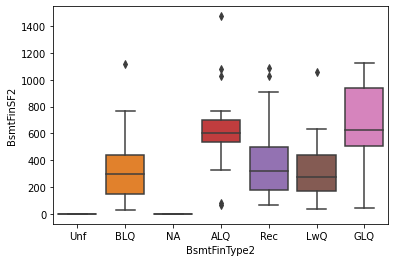

In [974]:
sns.boxplot(y="BsmtFinSF2",x="BsmtFinType2",data=housing)

Based on the value of BsmtFinType1 (GLQ), and BsmtFinSF2(479) replacing missing value for BsmtFinType2 with 'BLQ'.

In [975]:
housing.BsmtFinType2 = housing.BsmtFinType2.fillna('BLQ')

#### Treating missing values for `LotFrontage`

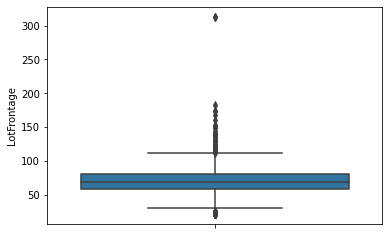

In [976]:
sns.boxplot(y = housing['LotFrontage'])

In [977]:
housing['LotFrontage'].describe(percentiles = (0.25,0.4,0.5,0.75,0.8,0.9))

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
40%        63.000000
50%        69.000000
75%        80.000000
80%        85.000000
90%        96.000000
max       313.000000
Name: LotFrontage, dtype: float64

(array([ 42.,  11.,  32.,  44.,  76.,  67., 183., 116., 147., 130., 141.,
         60.,  39.,  35.,  23.,  12.,  13.,   6.,   6.,   3.,   3.,   2.,
          3.,   1.,   0.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 21.  ,  26.84,  32.68,  38.52,  44.36,  50.2 ,  56.04,  61.88,
         67.72,  73.56,  79.4 ,  85.24,  91.08,  96.92, 102.76, 108.6 ,
        114.44, 120.28, 126.12, 131.96, 137.8 , 143.64, 149.48, 155.32,
        161.16, 167.  , 172.84, 178.68, 184.52, 190.36, 196.2 , 202.04,
        207.88, 213.72, 219.56, 225.4 , 231.24, 237.08, 242.92, 248.76,
        254.6 , 260.44, 266.28, 272.12, 277.96, 283.8 , 289.64, 295.48,
        301.32, 307.16, 313.  ]),
 <a list of 50 Patch objects>)

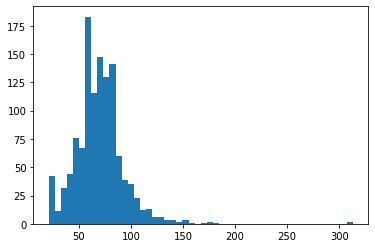

In [978]:
plt.hist(housing['LotFrontage'],bins=50)

In [979]:
print(all_data['LotFrontage'].mean())
print(all_data['LotFrontage'].median())

69.30579531442663
68.0


We noticed that all the values that were missing for `LotFrontage` - (Linear feet of street connected to property) have `Paved` Street (Type of road access to property).
Therefore, replacing the missing values with the median value of Paved Streets.

In [980]:
housing.loc[pd.isnull(housing['LotFrontage']),'LotFrontage'] = 68.0
housing_test.loc[pd.isnull(housing_test['LotFrontage']),'LotFrontage'] = 68.0

#### Treating Electrical

In [981]:
all_data['Electrical'].value_counts(dropna=False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [982]:
housing.loc[housing['Electrical'].isnull(),'Electrical'] = 'SBrKr'

#### Treating MasVnrType

In [983]:
housing.loc[housing['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,68.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,68.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000


In [984]:
housing_test['MasVnrType'].value_counts(dropna=False)

None       878
BrkFace    434
Stone      121
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64

In [985]:
housing.loc[housing['MasVnrType']=='None',['MasVnrType','MasVnrArea']].head()

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0


In [986]:
#replacing missing MasVnrType with None and MasVnrArea with 0.0
housing.loc[housing['MasVnrArea'].isnull(),['MasVnrArea']] = 0.0
housing.loc[housing['MasVnrType'].isnull(),['MasVnrType']] = 'None'

housing_test.loc[housing_test['MasVnrArea'].isnull(),['MasVnrArea']] = 0.0
housing_test.loc[housing_test['MasVnrType'].isnull(),['MasVnrType']] = 'None'


In [987]:
missing_info = pd.DataFrame(housing.isnull().sum())
missing_info = missing_info.loc[missing_info[0]!=0]
missing_info

,0


In [988]:
missing_info = pd.DataFrame(housing_test.isnull().sum())
missing_info = missing_info.loc[missing_info[0]!=0]
missing_info

,0
MSZoning,4
Utilities,2
Exterior1st,1
Exterior2nd,1
KitchenQual,1
Functional,2
SaleType,1


In [989]:
housing_test['MSZoning'].value_counts(dropna=False)

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [990]:
housing_test.loc[housing_test['MSZoning'].isnull(),'MSZoning'] = 'RL'

In [991]:
housing_test[housing_test['Utilities'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,RL,109.0,21780,Grvl,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,0,3,2009,ConLD,Normal
485,1946,20,RL,68.0,31220,Pave,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,750,5,2008,WD,Normal


In [992]:
all_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [993]:
housing_test.loc[housing_test['Utilities'].isnull(),'Utilities'] = 'AllPub'

In [994]:
all_data['Exterior2nd'].value_counts(dropna=False)


VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [995]:
housing_test['Exterior1st'].value_counts(dropna=False)
housing_test[housing_test['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,NA,1940.0,NA,0.0,0.0,NA,NA,Y,0,39,0,0,0,0,0,1,2008,WD,Normal


In [996]:
all_data.loc[((all_data.Neighborhood == 'Edwards') & (all_data.RoofStyle == 'Flat'))]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,945.0,Unf,0.0,0.0,945.0,GasA,TA,Y,SBrkr,980,0,0,980,0.0,2.0,2,0,4,0,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand
1000,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1952,1952,Flat,Tar&Grv,BrkComm,Brk Cmn,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasW,Fa,N,FuseF,944,0,0,944,0.0,0.0,1,0,2,1,Fa,4,Min1,0,NaN,Detchd,1956.0,Unf,2.0,528.0,TA,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0.0,Unf,0.0,697.0,697.0,GasA,TA,Y,SBrkr,1575,626,0,2201,0.0,0.0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2.0,432.0,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca
691,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1399,2860,90,RL,38.0,7840,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,Plywood,Wd Shng,BrkFace,355.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,976.0,Unf,0.0,0.0,976.0,GasA,TA,Y,SBrkr,1012,0,0,1012,0.0,2.0,2,0,4,0,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand


- Looking at the above data for neighbourhood 'Edwards' and exterior quality, the missing Exterior value will be replaced by 'BrkComm'

In [997]:
housing_test.loc[housing_test['Exterior1st'].isnull(),'Exterior1st'] = 'BrkComm'
housing_test.loc[housing_test['Exterior2nd'].isnull(),'Exterior2nd'] = 'Brk Cmn'

### Treating *KitchenQual*

In [998]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [999]:
housing_test.loc[housing_test['KitchenQual'].isnull(),'KitchenQual'] = 'TA'

### Treating *Functional*

In [1000]:
all_data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [1001]:
housing_test.loc[housing_test['Functional'].isnull(),'Functional'] = 'Typ'

In [1002]:
all_data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [1003]:
housing_test.loc[housing_test['SaleType'].isnull(),'SaleType'] = 'WD'

In [1004]:
missing_info = pd.DataFrame(housing_test.isnull().sum())
missing_info = missing_info.loc[missing_info[0]!=0]
missing_info

,0


- Data type check

In [1005]:
for i in ['MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','GarageCars']:
  housing[i] = housing[i].astype(str)
  housing_test[i] = housing_test[i].astype(str)

housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)
housing_test['GarageYrBlt'] = housing_test['GarageYrBlt'].astype(int)
#housing['OverallQual'] = housing['OverallQual'].astype(str)
#housing['OverallCond'] = housing['OverallCond'].astype(str)

- Derived Variables

In [1006]:
yearCols = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
#Coverting year cols 
housing['AgeBuilt'] = max(all_data['YearBuilt']) - housing['YearBuilt']
housing['AgeRemodAdd'] = max(all_data['YearRemodAdd']) - housing['YearRemodAdd']
housing['AgeGarageBlt'] = max(all_data['GarageYrBlt']) - housing['GarageYrBlt']
housing['AgeSold'] = max(all_data['YrSold']) - housing['YrSold']
housing[['AgeBuilt','AgeRemodAdd','AgeGarageBlt','AgeSold']].describe()
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

housing_test['AgeBuilt'] = max(all_data['YearBuilt']) - housing_test['YearBuilt']
housing_test['AgeRemodAdd'] = max(all_data['YearRemodAdd']) - housing_test['YearRemodAdd']
housing_test['AgeGarageBlt'] = max(all_data['GarageYrBlt']) - housing_test['GarageYrBlt']
housing_test['AgeSold'] = max(all_data['YrSold']) - housing_test['YrSold']
housing_test[['AgeBuilt','AgeRemodAdd','AgeGarageBlt','AgeSold']].describe()
housing_test.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

## Exploratory Data Analysis

In [1007]:
housing.drop(['Id'],axis=1,inplace=True)
housing_test.drop(['Id'],axis=1,inplace=True)
catColsData = housing.select_dtypes(include=['object'])
catCols = catColsData.columns
numCols = list(set(housing.columns) - set(catCols))
len(catCols)

44

#### Checking the skewness

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

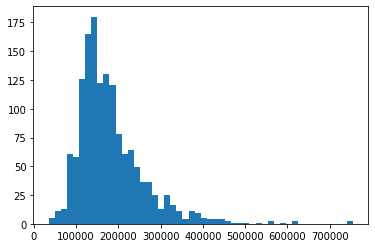

In [1008]:
# checking target variable
housing['SalePrice'].describe(percentiles = (0.25,0.4,0.5,0.75,0.8,0.9,0.95))
plt.hist(housing['SalePrice'],bins=50)

#### Inference: 
We notice that the data is skewed. Skewness in the data is because of the presence of outliers.
To handle these outlier we choose not to delete as the houses with higher sales price are indispensable.
Tranforming the Values in SalePrice between 0 to 1  will help in normalizing the data without losing any information.
Lets use sigmoid function to transform our target variable

In [1009]:
housing['SalePrice'] = housing['SalePrice'].astype(float)
housing['SalePrice'] = np.log(housing['SalePrice'])
housing['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

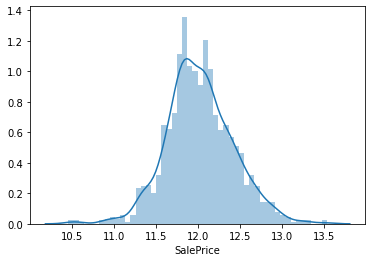

In [1010]:
sns.distplot(housing['SalePrice'],bins=50)

In [1011]:
housing['SalePrice'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

#### Visualizing Categortical Variables

In [1012]:
len(catCols)

44

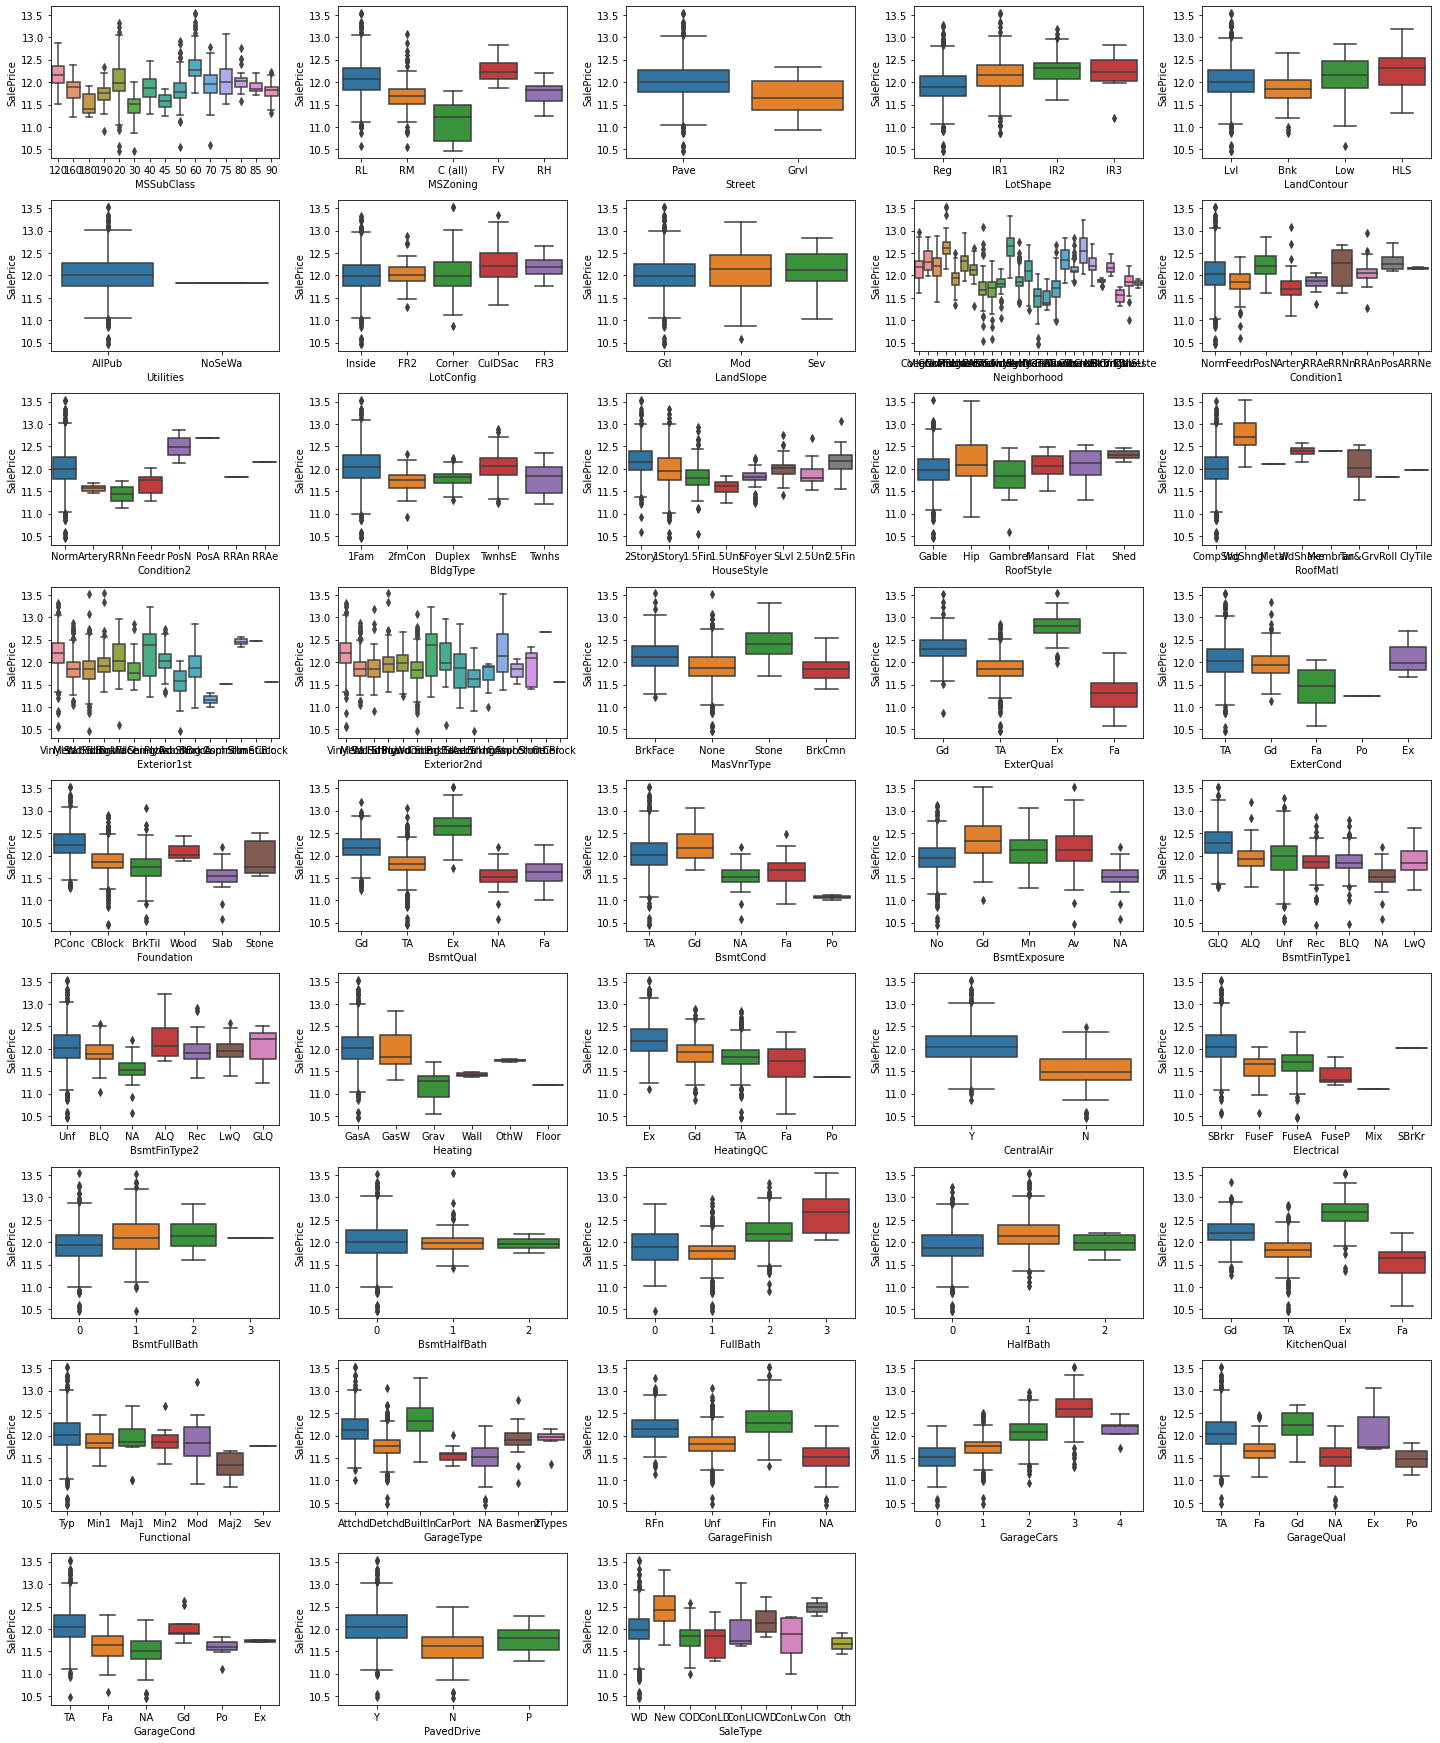

In [1013]:
def boxplot_catVariables(cols):
    plt.figure(figsize=(20, 40))
    for i in range(0,len(cols)):
        plt.subplot(15,5,i+1)
        sns.boxplot(x = cols[i], y = 'SalePrice', data = housing)
    plt.tight_layout()
    plt.show()
    
boxplot_catVariables(catCols[:-1])

In [1014]:
def countplot_catVariables(cols):
    plt.figure(figsize=(20, 40))
    for i in range(0,len(cols)):
        plt.subplot(14,3,i+1)
        sns.countplot(x = cols[i], data = housing)
    plt.show()
    
#countplot_catVariables(catCols[:-1])

In [1015]:
#housing[numCols].corr()

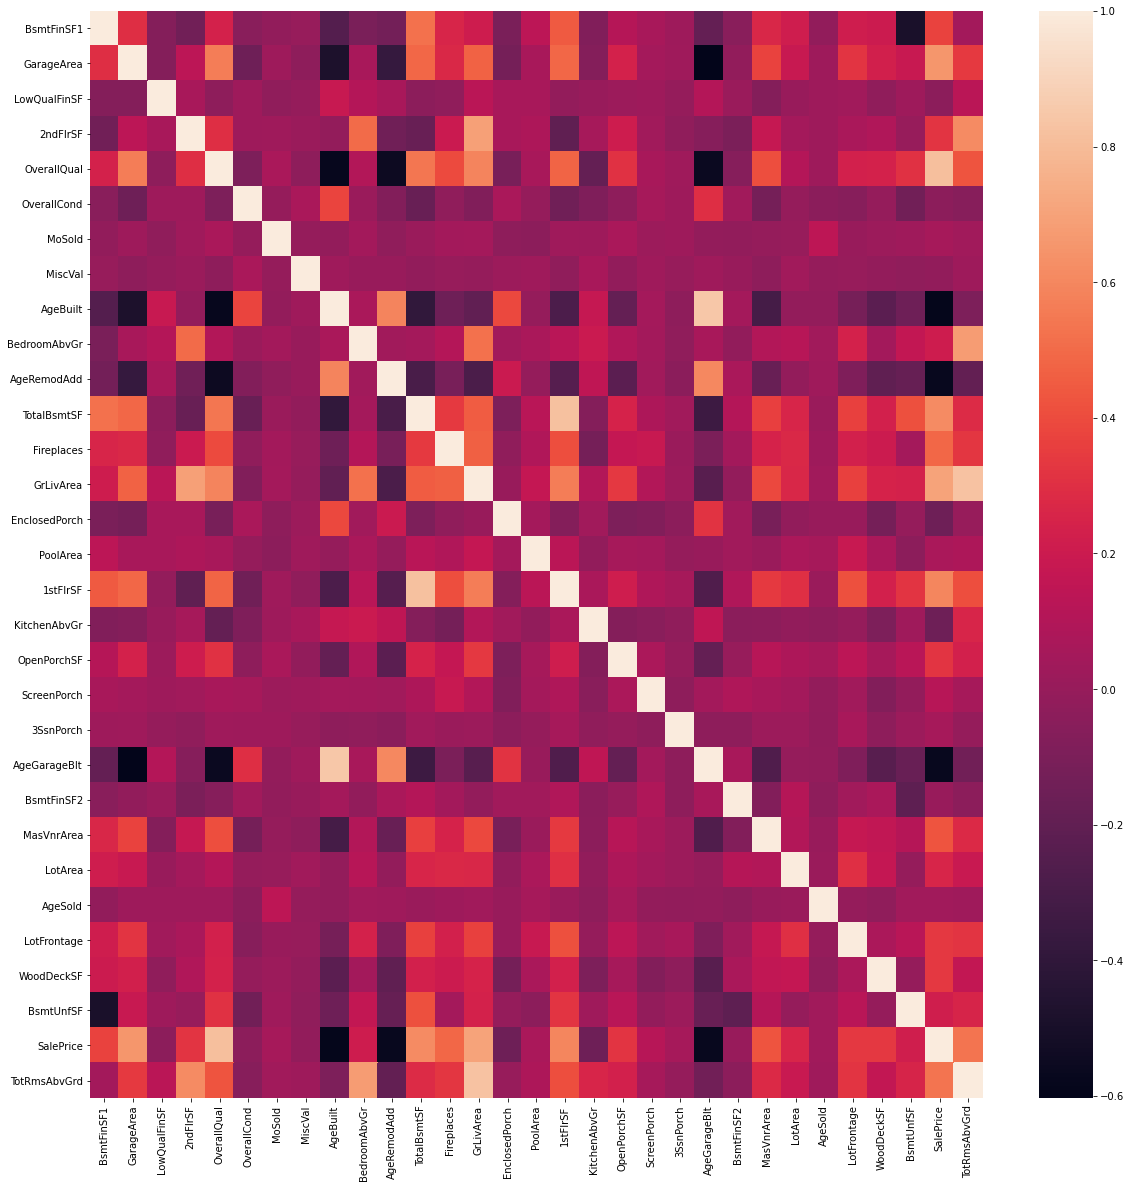

In [1016]:
plt.figure(figsize=(20, 20))
sns.heatmap(housing[numCols].corr())

Inferences: Some of the highly correlated variables are '
- BsmtFinSF1 and BsmtUnfSF
- TotalRoomsAbvGround and GrLivArea
- Garage Area and Garage Cars
- Sale Price is highly corelated
    - Total rooms Above Ground
    - Overall Quality
    - Ground Living Area
    - Total Bsmnt Surface Area

In [1017]:
# Dropping highly corelated variables
#housing.drop(['BsmtUnfSF','TotRmsAbvGrd','GarageCars','AgeGarageBlt'],axis=1,inplace=True)
#housing_test.drop(['BsmtUnfSF','TotRmsAbvGrd','GarageCars','AgeGarageBlt'],axis=1,inplace=True)


## Data Preparation

- Create dummy variables for categorical data

In [1018]:
print(housing.shape)
print(housing_test.shape)


(1460, 75)
(1459, 74)


In [1019]:
catCols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1036]:
all_data_dummies = pd.concat([housing[catCols],housing_test[catCols]])

In [1037]:
all_data_dummies.shape

(2919, 44)

In [1038]:
all_data_dummies = pd.get_dummies(all_data_dummies[catCols],drop_first=True)
all_data_dummies.head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrKr,Electrical_SBrkr,BsmtFullBath_0.0,BsmtFullBath_1,BsmtFullBath_1.0,BsmtFullBath_2,BsmtFullBath_2.0,BsmtFullBath_3,BsmtFullBath_3.0,BsmtHalfBath_0.0,BsmtHalfBath_1,BsmtHalfBath_1.0,BsmtHalfBath_2,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0.0,GarageCars_1,GarageCars_1.0,GarageCars_2,GarageCars_2.0,GarageCars_3,GarageCars_3.0,GarageCars_4,GarageCars_4.0,GarageCars_5.0,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,Sal

In [1039]:
housing_test_dummies = all_data_dummies[1460:]
housing_dummies = all_data_dummies[0:1460]

In [1041]:
housing_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 249 entries, MSSubClass_150 to SaleCondition_Partial
dtypes: uint8(249)
memory usage: 366.4 KB


In [1042]:
print(housing_test_dummies.info())
print(housing_dummies.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 249 entries, MSSubClass_150 to SaleCondition_Partial
dtypes: uint8(249)
memory usage: 366.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 249 entries, MSSubClass_150 to SaleCondition_Partial
dtypes: uint8(249)
memory usage: 366.4 KB
None


In [1043]:
housing = housing.drop(catCols,inplace=False,axis=1)
housing_test = housing_test.drop(catCols,inplace=False,axis=1)

housing.head()


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeSold
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,3,1,8,0,548,0,61,0,0,0,0,0,2,12.247694,7,7,204.0,2
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,3,1,6,1,460,298,0,0,0,0,0,0,5,12.109011,34,34,231.0,3
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,3,1,6,1,608,0,42,0,0,0,0,0,9,12.317167,9,8,206.0,2
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,3,1,7,1,642,0,35,272,0,0,0,0,2,11.849398,95,40,209.0,4
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,4,1,9,1,836,192,84,0,0,0,0,0,12,12.429216,10,10,207.0,2


In [1044]:
housing = pd.concat([housing,housing_dummies],axis=1)
housing_test = pd.concat([housing_test,housing_test_dummies],axis=1)

In [1045]:
housing.shape

(1460, 280)

In [1046]:
X = housing.drop(['SalePrice'],axis=1,inplace=False)
y = housing['SalePrice']
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeSold,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrKr,Electrical_SBrkr,BsmtFullBath_0.0,BsmtFullBath_1,BsmtFullBath_1.0,BsmtFullBath_2,BsmtFullBath_2.0,BsmtFullBath_3,BsmtFullBath_3.0,BsmtHalfBath_0.0,BsmtHalfBath_1,BsmtHalfBath_1.0,BsmtHalfBath_2,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0.0,GarageCars_1,GarageCars_1.0,GarageCars_2,GarageCars_2.0,GarageCars_3,GarageCars_3.0,GarageCars_4,GarageCars_4.0,GarageCars_5.0,GarageQual_Fa,Ga

In [1047]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [1048]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
housing_test_scaled = scaler.transform(housing_test)

In [1049]:
X_train.shape

(1022, 279)

In [1050]:
housing_test.shape

(1459, 279)

In [1051]:
X_train.shape

(1022, 279)

In [1052]:
X_train[:10]

array([[-0.10841021, -0.47394256, -0.78071743, ..., -0.11785113,
         0.45923902, -0.29142013],
       [ 0.93340922, -0.05681892,  0.64919872, ..., -0.11785113,
         0.45923902, -0.29142013],
       [-0.78785766, -0.16935297, -0.06575935, ..., -0.11785113,
         0.45923902, -0.29142013],
       ...,
       [ 0.43514776,  0.17883264,  1.3641568 , ..., -0.11785113,
         0.45923902, -0.29142013],
       [-0.06311371, -0.18848085, -2.21063359, ..., -0.11785113,
         0.45923902, -0.29142013],
       [-0.38018919, -0.31324897, -0.06575935, ..., -0.11785113,
         0.45923902, -0.29142013]])

In [1053]:
#lm = LinearRegression(alpha=500)
#ridge.fit(X_train,y_train)
#rfe = RFE(ridge,37)
#rfe.fit(X_train,y_train)

In [1054]:
#rfeCols = list(X.columns[rfe.support_])
#rfeCols

In [1055]:
#X_rfe = X[rfeCols]
#X_train,X_test,y_train,y_test = train_test_split(X[rfeCols],y,test_size=0.3,random_state=100)


#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

## Ridge Regression

In [1056]:
params = {'alpha':[0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20,50,100, 200, 500,600,700,800,1000]}

ridge = Ridge()
folds = KFold(n_splits=5,shuffle=True,random_state=101)

model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = folds,
                       return_train_score = True,
                       verbose =1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 200, 500, 600, 700, 800,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [1057]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014801,0.005045,0.000861,0.000504,0.1,{'alpha': 0.1},-0.015190,-0.054698,-0.061244,-0.032766,-0.120085,-0.056796,0.035604,28,-0.005301,-0.006207,-0.005330,-0.005047,-0.005782,-0.005533,0.000412
1,0.009218,0.001121,0.001257,0.001320,0.2,{'alpha': 0.2},-0.015074,-0.053673,-0.061267,-0.032580,-0.117247,-0.055968,0.034663,27,-0.005304,-0.006210,-0.005330,-0.005049,-0.005785,-0.005535,0.000412
2,0.010327,0.003297,0.000634,0.000068,0.3,{'alpha': 0.3},-0.014972,-0.052694,-0.061287,-0.032405,-0.114536,-0.055179,0.033770,26,-0.005307,-0.006213,-0.005331,-0.005053,-0.005788,-0.005538,0.000412
3,0.008556,0.000177,0.000608,0.000024,0.4,{'alpha': 0.4},-0.014881,-0.051752,-0.061305,-0.032238,-0.111942,-0.054424,0.032920,25,-0.005312,-0.006217,-0.005332,-0.005057,-0.005793,-0.005542,0.000413
4,0.010281,0.002663,0.000635,0.000076,0.5,{'alpha': 0.5},-0.014800,-0.050846,-0.061320,-0.032080,-0.109459,-0.053701,0.032112,24,-0.005318,-0.006222,-0.005334,-0.005063,-0.005799,-0.005547,0.000413


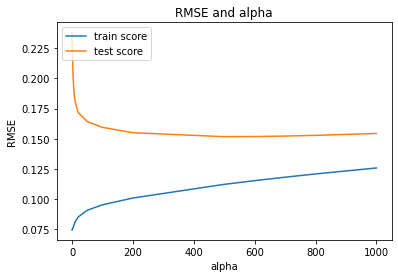

In [1058]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], np.sqrt(-cv_results['mean_train_score']))
plt.plot(cv_results['param_alpha'], np.sqrt(-cv_results['mean_test_score']))
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title("RMSE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1059]:
print(model_cv.best_params_['alpha'])
print(np.sqrt(-model_cv.best_score_))

500
0.1517088404941402


- Best value of alpha for ridge regression model is 500

In [1060]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha = alpha)
ridge.fit(X_train,y_train)
#ridge.coef_
y_train_pred = ridge.predict(X_train) 
y_test_pred = ridge.predict(X_test)
print("Training r2: {}".format(round(r2_score(y_train,y_train_pred),3)))
print("Training RMSE: {}".format(round(np.sqrt(mean_squared_error(y_train,y_train_pred)),3)))
print("Testing r2: {}".format(round(r2_score(y_test,y_test_pred),3)))
print("Testing RMSE: {}".format(round(np.sqrt(mean_squared_error(y_test,y_test_pred)),3)))

Training r2: 0.918
Training RMSE: 0.113
Testing r2: 0.875
Testing RMSE: 0.143


In [1061]:
coefs = pd.Series(ridge.coef_, index = X.columns)
coefs.sort_values(ascending = False).head()

OverallQual              0.040710
GrLivArea                0.033613
1stFlrSF                 0.027064
TotRmsAbvGrd             0.022085
Fireplaces               0.021373
OverallCond              0.020861
GarageCars_3             0.019563
Neighborhood_NridgHt     0.018324
TotalBsmtSF              0.017679
2ndFlrSF                 0.016163
CentralAir_Y             0.016072
HalfBath_1               0.015459
Neighborhood_Crawfor     0.015392
GarageArea               0.014796
FullBath_3               0.014294
BsmtFullBath_1           0.014055
BsmtExposure_Gd          0.014000
LotArea                  0.013465
Neighborhood_NoRidge     0.013232
BsmtFinType1_GLQ         0.011991
RoofMatl_WdShngl         0.011493
MSZoning_RL              0.011264
BsmtFinSF1               0.010919
WoodDeckSF               0.010827
Neighborhood_Somerst     0.010509
Exterior1st_BrkFace      0.010072
SaleCondition_Normal     0.010054
Neighborhood_StoneBr     0.009818
Condition1_Norm          0.009749
MSSubClass_70 

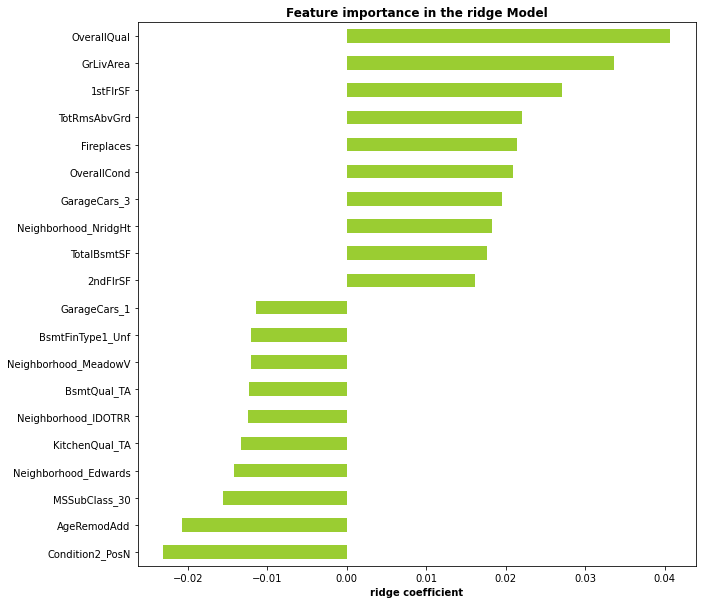

In [1066]:
plt.figure(figsize=(10,10))
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')

plt.xlabel("ridge coefficient", weight='bold')
plt.title("Feature importance in the ridge Model", weight='bold')
plt.show()

In [1083]:
final_ridge_pred = np.exp(ridge.predict(housing_test_scaled))
ridge_submission = pd.DataFrame({
        "Id": testId,
        "SalePrice": final_ridge_pred
    })
ridge_submission.to_csv("ridge_submission.csv", index=False)
ridge_submission.head()

,Id,SalePrice
0,1461,123169.285316
1,1462,156855.798221
2,1463,181836.843829
3,1464,199833.961260
4,1465,191462.977783


## Lasso Regression

In [1068]:
lasso = Lasso()

params = {'alpha':[0.0001,0.0005,0.0011, 0.001, 0.01,0.02,0.03, 0.05, 0.1, 
 0.2]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.0011, 0.001, 0.01, 0.02,
                                   0.03, 0.05, 0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [1069]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.184260,0.008060,0.002116,0.002451,0.0001,{'alpha': 0.0001},-0.013899,-0.051920,-0.061875,-0.032062,-0.112039,-0.054359,0.033237,9,-0.005362,-0.006251,-0.005377,-0.005108,-0.005833,-0.005586,0.000407
1,0.094345,0.003285,0.000829,0.000091,0.0005,{'alpha': 0.0005},-0.012392,-0.041481,-0.060873,-0.029008,-0.076851,-0.044121,0.022777,7,-0.005915,-0.006654,-0.005737,-0.005564,-0.006326,-0.006039,0.000398
2,0.052494,0.008444,0.000641,0.000022,0.0011,{'alpha': 0.0011},-0.012167,-0.030834,-0.059125,-0.026028,-0.048291,-0.035289,0.016598,5,-0.006866,-0.007501,-0.006333,-0.006580,-0.007396,-0.006935,0.000453
3,0.055386,0.008164,0.000638,0.000020,0.001,{'alpha': 0.001},-0.012183,-0.032480,-0.059437,-0.026308,-0.051888,-0.036459,0.017171,6,-0.006690,-0.007367,-0.006223,-0.006385,-0.007213,-0.006776,0.000449
4,0.010606,0.000431,0.000646,0.000094,0.01,{'alpha': 0.01},-0.013941,-0.016010,-0.053109,-0.023407,-0.022709,-0.025835,0.014125,1,-0.016463,-0.016355,-0.011135,-0.016043,-0.015395,-0.015078,0.002006


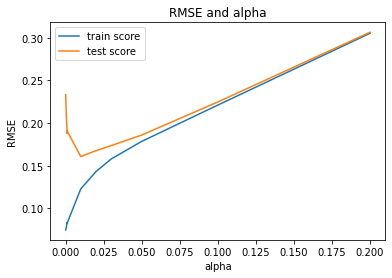

In [1070]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], np.sqrt(-cv_results['mean_train_score']))
plt.plot(cv_results['param_alpha'], np.sqrt(-cv_results['mean_test_score']))
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title("RMSE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1071]:
print(model_cv.best_params_)
print(np.sqrt(-model_cv.best_score_))

{'alpha': 0.01}
0.16073299378755773


In [1072]:
alpha =model_cv.best_params_['alpha']
lasso = Lasso(alpha = alpha)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print("Training r2: {}".format(round(r2_score(y_train,y_train_pred),3)))
print("Training RMSE: {}".format(round(np.sqrt(mean_squared_error(y_train,y_train_pred)),3)))
print("Testing r2: {}".format(round(r2_score(y_test,y_test_pred),3)))
print("Testing RMSE: {}".format(round(np.sqrt(mean_squared_error(y_test,y_test_pred)),3)))

Training r2: 0.897
Training RMSE: 0.127
Testing r2: 0.86
Testing RMSE: 0.152


In [1073]:
sum(lasso.coef_!=0)

61

In [1074]:
coefs = pd.Series(lasso.coef_, index = X.columns)
coefs.sort_values(ascending = False).head()

GrLivArea      0.114845
OverallQual    0.106060
GarageArea     0.029825
OverallCond    0.022938
TotalBsmtSF    0.022768
dtype: float64

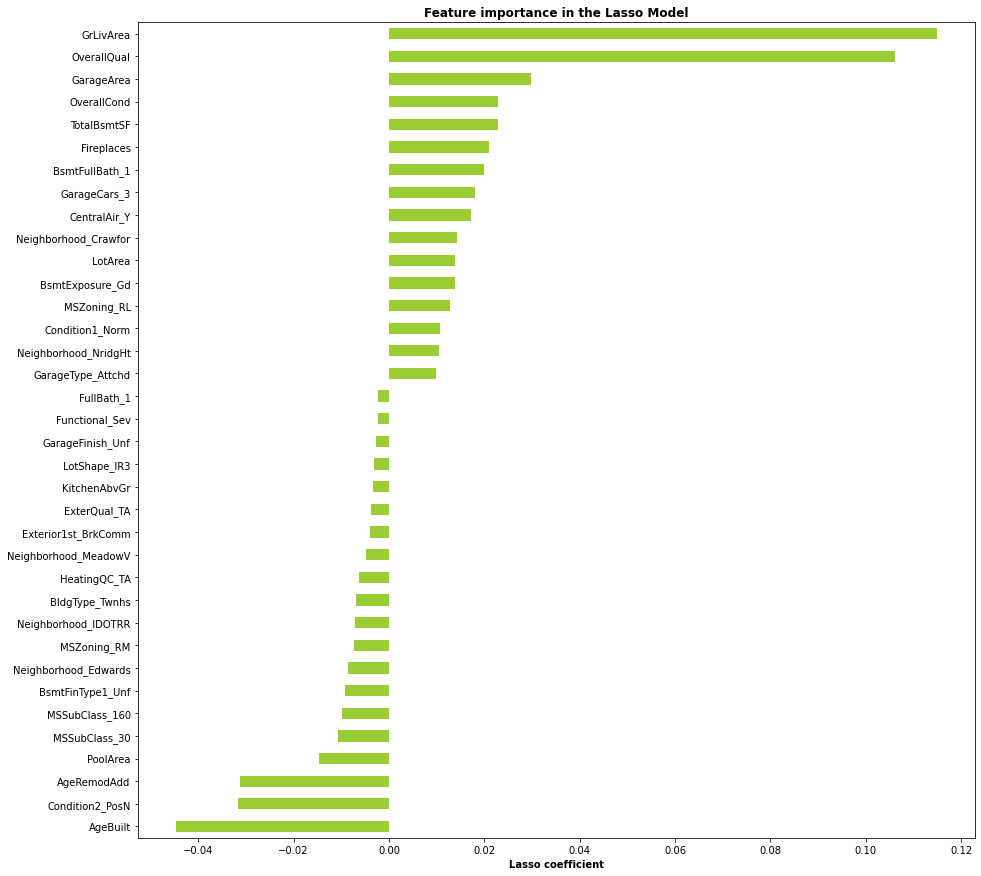

In [1075]:
plt.figure(figsize=(15,15))

imp_coefs = pd.concat([coefs.sort_values().head(20),
                     coefs.sort_values().tail(16)])
imp_coefs.plot(kind = "barh", color='yellowgreen')

plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [1084]:
final_lasso_pred = np.exp(lasso.predict(housing_test_scaled))
lasso_submission = pd.DataFrame({
        "Id": testId,
        "SalePrice": final_lasso_pred
    })
lasso_submission.to_csv("lasso_submission.csv", index=False)
lasso_submission.head()

,Id,SalePrice
0,1461,119253.752030
1,1462,148799.675540
2,1463,172906.698614
3,1464,190807.158533
4,1465,189333.198201


## RandomForestRegressor

In [1077]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

param_grid = {
    'max_depth': [20,30,40],
    'min_samples_leaf': [4,5,6],
    'min_samples_split': [4,5,6],
    'n_estimators': [100,200],
    'max_features': [100,150,200]
}

rf_reg = GridSearchCV(rf,
                      param_grid, 
                      cv = 5, 
                      n_jobs =10,
                     verbose=1,
                     scoring = 'neg_mean_squared_error')
#rf_reg.fit(X_train, y_train)

#print(rf_reg.best_estimator_)
#best_estimator=rf_reg.best_estimator_


In [1078]:
rf_model = RandomForestRegressor(
                                  min_samples_leaf =4,
                                  min_samples_split= 4,
                                  n_estimators=200,
                                  max_features=150,
                                  max_depth=20)
rf_model.fit(X_train,y_train)
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 0.0878516174146093
Root Mean Square Error test = 0.15606658595187897


In [1085]:
final_rf_pred = np.exp(rf_model.predict(housing_test_scaled))
rf_submission = pd.DataFrame({
        "Id": testId,
        "SalePrice": final_rf_pred
    })
rf_submission.to_csv("rf_submission.csv", index=False)
rf_submission.head()

,Id,SalePrice
0,1461,124293.967326
1,1462,152528.030362
2,1463,180149.964940
3,1464,178906.655828
4,1465,197273.046519


In [ ]:
# Kagge Score RMSE : 0.151